# Sampling and Quantization

:::{note}
This notebook adapts content from the [Sampling](https://francescopapaleo.github.io/audio-signal-processing/notebooks/sampling.html) and [Quantization](https://francescopapaleo.github.io/audio-signal-processing/notebooks/quantization.html) sections of the Jupyter Book [**"Audio Signal Processing Concepts Explained with Python"**](https://francescopapaleo.github.io/audio-signal-processing/intro.html#) by Francesco Papaleo.
:::


(primer-sampling)=
## Sampling

Sound waves are temporally continuous processes. However, in the digital age, when we record the signal, we **sample** the original **analog** waveform into **discrete** digital samples. Our sampling strategy determines our ability to reconstruct the original signal from the samples. In general, a higher **sampling rate** helps with the reconstruction, but the actual frequency components in the signal determines if a recording generated from a particular sampling rate allows us to reconstruct the original signal.

Below we will demonstrate this by using a simple sine wave. Since we cannot have a continuous signal in the notebook here, we will start with one sine wave with very high sampling rate, and see what happens when we reduce the sampling rate.

### Sampling a sine wave

Here, we will generate a continuous 5 Hz sine wave with a sampling rate of 10000 samples/s, and reduce the sampling rate to 100 samples/s.

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

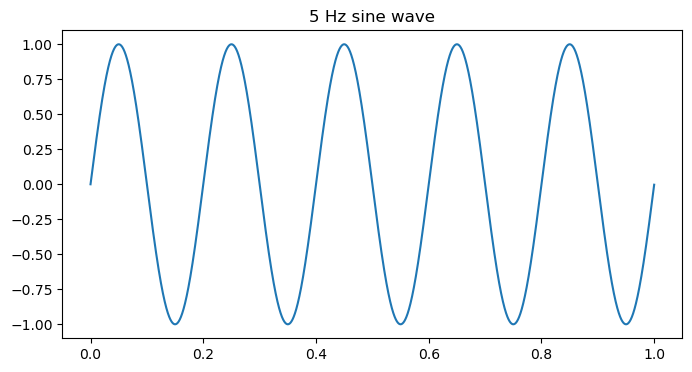

In [2]:
# Sine Wave 5Hz
freq = 5 
N = 10000 # number of samples
end_time = 1
time = np.linspace(0, end_time, end_time*N, endpoint=False) # 1 sec
A = 1 # amplitude
cw = A*np.sin(2*np.pi*freq*time) # zero phase

plt.figure(figsize=(8,4))
plt.plot(time, cw)
plt.title("5 Hz sine wave")
plt.show()

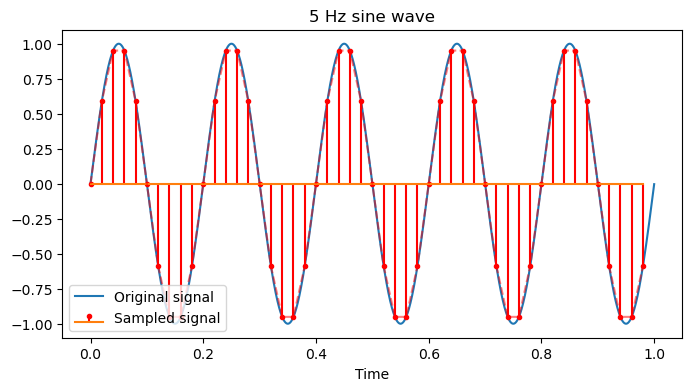

In [3]:
freq = 5
N_high = 10000
N_low = 50
end_time = 1
A = 1

# high res
time_high = np.linspace(0, end_time, end_time*N, endpoint=False) # 1 sec
cw = A*np.sin(2*np.pi*freq*time_high) # zero phase

# low res
time_low = np.linspace(0, end_time, end_time*N_low, endpoint=False)
cw_sampled = A*np.sin(2*np.pi*freq*time_low) # sampled cw sample

plt.figure(figsize=(8,4))
plt.xlabel("Time")
plt.plot(time, cw, label="Original signal")
plt.stem(time_low, cw_sampled, linefmt='r-', markerfmt='.', basefmt='', label='Sampled signal')
plt.plot(time_low, cw_sampled, 'r--', alpha=0.5)
plt.title("5 Hz sine wave")
plt.legend(loc="lower left", fontsize=10)
plt.show()

:::{admonition} Exercise
Using the widget below, can you see at what point the sampling process start to fail and you can no longer see the waveform from the discrete samples?
:::

In [4]:
from ipywidgets import widgets

def sample(N_low):

    freq = 5
    N_high = 10000
    end_time = 1
    A = 1

    # high res
    time_high = np.linspace(0, end_time, end_time*N, endpoint=False) # 1 sec
    cw = A*np.sin(2*np.pi*freq*time_high) # zero phase

    # low res
    time_low = np.linspace(0, end_time, end_time*N_low, endpoint=False)
    cw_sampled = A*np.sin(2*np.pi*freq*time_low) # sampled cw sample

    plt.figure(figsize=(8,4))
    plt.xlabel("Time")
    plt.plot(time, cw, label='Original signal')
    plt.stem(time_low, cw_sampled, linefmt='r-', markerfmt='.', basefmt='', label='Sampled signal')
    plt.plot(time_low, cw_sampled, 'r--', alpha=0.5)
    plt.title("5 Hz sine wave")
    plt.legend(loc="lower left", fontsize=10)
    plt.show()

out = widgets.interact(
    sample,
    N_low=widgets.IntSlider(
        value=50,
        min=1,
        max=100,
        step=1,
        description='Low sampling rate (samples/s)',
        continuous_update=True,
        style={'description_width': 'initial'},
        layout=widgets.Layout(width="400px"),
    )

)

interactive(children=(IntSlider(value=50, description='Low sampling rate (samples/s)', layout=Layout(width='40…

:::{important}

The **Nyquist rate** of the signal is twice the highest frequency in the signal. When sampling at a higher rate, the reconstructio is distortion free, while if it is lower we would observe **aliasing** artifacts.
:::

(primer-quantization)=
## Quantization

In the above, we discussed the digitization of the signal through sampling in time. What about the digitization of the signal ampliude? In the digital world, we cannot store values with infinite fractions. Instead, we have to store the digitized samples with a finite number of **bits**, which varies depending on the device.

When a signal is **quantized** to a **bit depth** of $b$, the signal amplitude is represented by one of the $2^{b}$ possible levels. Therefore, the higher the bit depth, the more accurate the signal amplitude. For example, a 24-bit device is able to represent the signal amplitude more accurately than a 16-bit device. We often use the **dynamic range (dB)** to characterize this.

$$\textrm{Dynamic range} = 20 \log_{10}(2^b)$$

You can use the widget below to see how quantization would affect the digital samples from the original waveform.

In [5]:
def quantize(signal, bit_depth):
    levels = 2 ** bit_depth
    quantized_signal = np.round((signal + 1) * (levels / 2)) / (levels / 2) - 1
    return quantized_signal
    
def plot_quantized(bits):

    quantized_x = quantize(cw, bits)
    sb_value = 2 / (2 ** bits)  # LSB value

    plt.figure(figsize=(6, 4))
    plt.plot(time[:2000], cw[:2000], 'k', linestyle='dashed', alpha=0.5, label="Original Signal")
    plt.step(time[:2000], quantized_x[:2000], 'b', lw=0.5, label="Quantized signal", where='mid')
    plt.xlabel("Time")
    plt.legend()
    plt.title(f"Quantization at {bits}-bit depth")
    plt.show()
out = widgets.interact(
    plot_quantized,
    bits=widgets.IntSlider(
        value=4,
        min=2,
        max=16,
        step=1,
        description='Bit depth',
        continuous_update=False,
    )
)

interactive(children=(IntSlider(value=4, continuous_update=False, description='Bit depth', max=16, min=2), Out…

:::{admonition} Exercise
Based on the number of levels one can represent using bits:
- What is the maximum quantization error for a sample point in a 4-, 8-, 16-, or 32-bit system that accepts input signals at +/- 1 V?
- What is the dynamic range for each of these systems?
:::